In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import  packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import missingno


In [3]:
df = pd.read_csv('/content/drive/MyDrive/M.L. Final Project/Data/Data by Ward.csv')
df.head()

,Unnamed: 0,Ward,Number of Contributions,Average Contribution,Sum of Contributions,Median Contribution,Total Count of Business Licenses,LICENSE TERM START DATE,Affiliation,Animal Care License,Bicycle Messenger Service,Caterer's Liquor License,Children's Services Facility License,Commercial Garage,Commercial Passenger Vessel,Consumption on Premises - Incidental Activity,Emerging Business,Explosives,Filling Station,Food - Shared Kitchen,Food - Shared Kitchen - Supplemental,Heliports,Late Hour,License Manager,Limited Business License,Manufacturing Establishments,Mobile Food License,Motor Vehicle Services License,Music and Dance,Navy Pier Kiosk License,Not-For-Profit Club,Outdoor Patio,Package Goods,Pawnbroker,Peddler License,Pharmaceutical Representative,Pop-Up Establishment Host - Tier II,Pop-Up Establishment Host - Tier III,Pop-Up Retail User,Private Booting Registration,...,Total Count of Crimes,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON-CRIMINAL,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Total Count of Microlenders,White2016,Black2016,Asian2016,Latino2016,Other2016
0,0,1,5.0,300.000000,1500.0,250.0,1876,1876,0.0,22.0,1.0,15.0,27.0,0.0,0.0,174.0,0.0,1.0,8.0,1.0,3.0,0.0,9.0,0.0,525.0,9.0,2.0,24.0,4.0,0.0,0.0,46.0,47.0,3.0,17.0,28.0,0.0,0.0,1.0,0.0,...,9057,13.0,582.0,1215.0,444.0,2.0,15.0,926.0,37.0,200.0,884.0,1.0,14.0,0.0,12.0,7.0,2.0,17.0,338.0,97.0,0.0,4.0,46.0,0.0,404.0,5.0,1.0,38.0,0.0,330.0,43.0,13.0,3264.0,103.0,11,0.503864,0.058962,0.036905,0.376608,0.023661
1,1,2,26.0,707.692308,18400.0,500.0,2299,2299,0.0,30.0,0.0,6.0,22.0,56.0,0.0,228.0,0.0,0.0,7.0,1.0,1.0,1.0,14.0,1.0,735.0,7.0,1.0,19.0,6.0,0.0,2.0,59.0,60.0,0.0,16.0,33.0,1.0,0.0,0.0,0.0,...,9345,5.0,491.0,1000.0,383.0,2.0,16.0,614.0,49.0,274.0,1259.0,0.0,4.0,1.0,15.0,10.0,3.0,14.0,340.0,71.0,0.0,2.0,21.0,0.0,306.0,1.0,0.0,38.0,0.0,382.0,55.0,10.0,3897.0,82.0,9,0.747049,0.058640,0.069351,0.101647,0.023313
2,2,3,12.0,750.000000,9000.0,625.0,1165,1165,0.0,5.0,0.0,6.0,27.0,13.0,1.0,58.0,0.0,0.0,15.0,1.0,1.0,0.0,0.0,0.0,340.0,6.0,0.0,18.0,0.0,0.0,0.0,16.0,18.0,2.0,41.0,18.0,0.0,0.0,1.0,0.0,...,15238,32.0,1444.0,3259.0,372.0,5.0,24.0,1603.0,62.0,355.0,1280.0,2.0,41.0,1.0,89.0,6.0,13.0,14.0,735.0,578.0,0.0,8.0,116.0,3.0,1163.0,20.0,2.0,109.0,0.0,511.0,67.0,16.0,2835.0,473.0,7,0.225988,0.598072,0.111786,0.040704,0.023450
3,3,4,9.0,538.888889,4850.0,500.0,1358,1358,0.0,10.0,0.0,14.0,12.0,51.0,1.0,110.0,0.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,376.0,1.0,2.0,2.0,1.0,0.0,1.0,26.0,39.0,1.0,26.0,24.0,0.0,0.0,0.0,0.0,...,13891,9.0,1223.0,2553.0,349.0,4.0,24.0,1269.0,56.0,416.0,1257.0,0.0,16.0,0.0,45.0,9.0,7.0,2.0,572.0,244.0,0.0,5.0,98.0,0.0,867.0,0.0,0.0,111.0,0.0,563.0,59.0,21.0,3836.0,276.0,11,0.241691,0.599667,0.091333,0.038784,0.028525
4,4,5,38.0,500.657895,19025.0,500.0,756,756,0.0,3.0,0.0,4.0,16.0,15.0,1.0,34.0,0.0,5.0,8.0,0.0,0.0,2.0,1.0,0.0,194.0,2.0,0.0,5.0,2.0,0.0,1.0,9.0,13.0,1.0,29.0,8.0,0.0,0.0,0.0,0.0,...,12597,13.0,1141.0,2633.0,603.0,5.0,29.0,1507.0,73.0,223.0,902.0,1.0,36.0,1.0,49.0,8.0,8.0,0.0,529.0,267.0,1.0,5.0,113.0,0.0,884.0,0.0,0.0,57.0,0.0,508.0,62.0,24.0,2523.0,392.0,7,0.236848,0.617225,0.074328,0.045595,0.026004


In [4]:
df.columns

Index(['Unnamed: 0', 'Ward', 'Number of Contributions', 'Average Contribution',
       'Sum of Contributions', 'Median Contribution',
       'Total Count of Business Licenses', 'LICENSE TERM START DATE',
       'Affiliation', 'Animal Care License', 'Bicycle Messenger Service',
       'Caterer's Liquor License', 'Children's Services Facility License',
       'Commercial Garage', 'Commercial Passenger Vessel',
       'Consumption on Premises - Incidental Activity', 'Emerging Business',
       'Explosives', 'Filling Station', 'Food - Shared Kitchen',
       'Food - Shared Kitchen - Supplemental', 'Heliports', 'Late Hour',
       'License Manager', 'Limited Business License',
       'Manufacturing Establishments', 'Mobile Food License',
       'Motor Vehicle Services License', 'Music and Dance',
       'Navy Pier Kiosk License', 'Not-For-Profit Club', 'Outdoor Patio',
       'Package Goods', 'Pawnbroker', 'Peddler License',
       'Pharmaceutical Representative', 'Pop-Up Establishment Host

(array([39.,  8.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 444. , 1350.3, 2256.6, 3162.9, 4069.2, 4975.5, 5881.8, 6788.1,
        7694.4, 8600.7, 9507. ]),
 <a list of 10 Patch objects>)

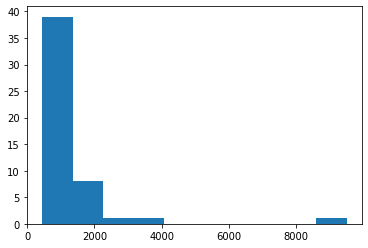

In [5]:
plt.hist(df['Total Count of Business Licenses'])

(array([18., 11.,  3.,  2.,  3.,  8.,  0.,  1.,  2.,  2.]),
 array([ 4216. ,  6440.8,  8665.6, 10890.4, 13115.2, 15340. , 17564.8,
        19789.6, 22014.4, 24239.2, 26464. ]),
 <a list of 10 Patch objects>)

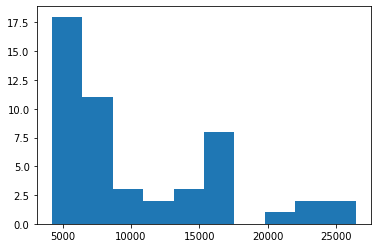

In [6]:
plt.hist(df['Total Count of Crimes'])

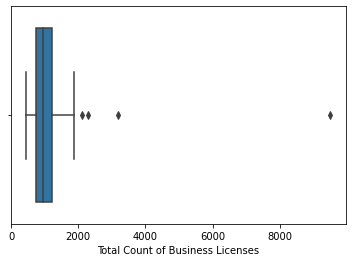

In [7]:
sns.boxplot(x=df['Total Count of Business Licenses'])

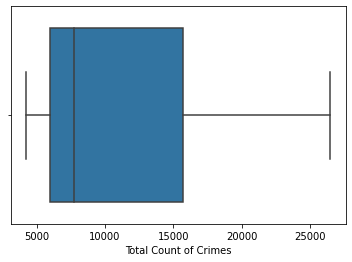

In [8]:
sns.boxplot(x=df['Total Count of Crimes'])

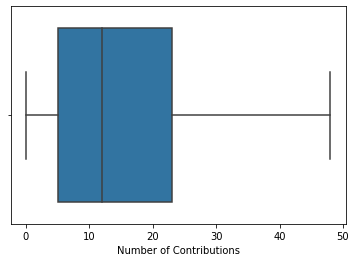

In [9]:
sns.boxplot(x=df['Number of Contributions'])

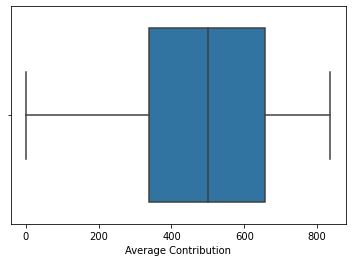

In [10]:
sns.boxplot(x=df['Average Contribution'])

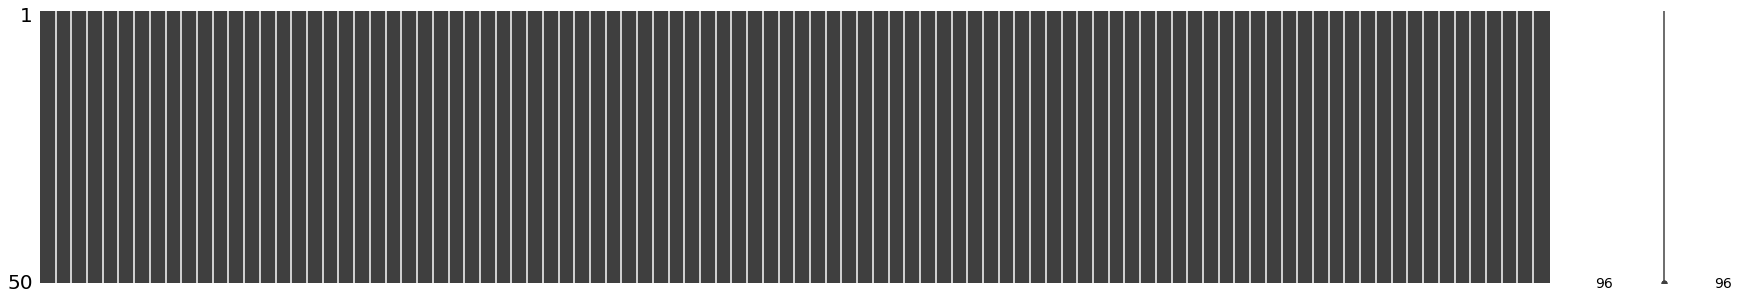

In [11]:
missingno.matrix(df, figsize = (30,5))

In [12]:
#imports for modelings

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Dropout


# Initial Model to Predict Number of Contributions

In [13]:
x = df.drop(['Number of Contributions'], axis=1)
y = df['Number of Contributions']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.9625121651898544e-13
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 19.96525123266399
R2 score is -0.7488396260745867


# Same model but dropping other contributions predictors

In [17]:
x = df.drop(['Number of Contributions', 'Average Contribution', 'Sum of Contributions', 'Median Contribution'], axis=1)
y = df['Number of Contributions']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [19]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.3613818241069433e-12
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 39.31223360477703
R2 score is -5.780408597051367


# Choosing Average Contribution as Response Variable

In [21]:
x = df.drop(['Number of Contributions', 'Average Contribution', 'Sum of Contributions', 'Median Contribution'], axis=1)
y = df['Average Contribution']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [23]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.384183306206564e-11
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 1238.1754887139564
R2 score is -107.83997598436665


Above, we can see linear models might not be the best option for this dataset, will try different models below

# Ridge regression for Number of Contributions

In [25]:
x = df.drop(['Number of Contributions', 'Average Contribution', 'Sum of Contributions', 'Median Contribution'], axis=1)
y = df['Number of Contributions']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
ridgeModel = Ridge(alpha=1.0)
ridgeModel.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
# model evaluation for training set
y_train_predict = ridgeModel.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = ridgeModel.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.016305322579594893
R2 score is 0.9999978895314087


The model performance for testing set
--------------------------------------
RMSE is 39.11782593397101
R2 score is -5.713513179654123


# Lasso Regression for Number of Contributions

In [29]:
x = df.drop(['Number of Contributions', 'Average Contribution', 'Sum of Contributions', 'Median Contribution'], axis=1)
y = df['Number of Contributions']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [31]:
lassoModel = Lasso(alpha=1.0)
lassoModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261.57463443662374, tolerance: 0.4661027027027027
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
# model evaluation for training set
y_train_predict = ridgeModel.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = ridgeModel.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.016305322579594893
R2 score is 0.9999978895314087


The model performance for testing set
--------------------------------------
RMSE is 39.11782593397101
R2 score is -5.713513179654123


# Ridge Regression for Number of Contributions

In [33]:
x = df.drop(['Number of Contributions', 'Average Contribution', 'Sum of Contributions', 'Median Contribution'], axis=1)
y = df['Number of Contributions']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [35]:
ridgeModel = Ridge(alpha=1.0)
ridgeModel.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
# model evaluation for training set
y_train_predict = ridgeModel.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = ridgeModel.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.016305322579594893
R2 score is 0.9999978895314087


The model performance for testing set
--------------------------------------
RMSE is 39.11782593397101
R2 score is -5.713513179654123


# Random Forest for Number of Contributions

In [37]:
x = df.drop(['Number of Contributions', 'Average Contribution', 'Sum of Contributions', 'Median Contribution'], axis=1)
y = df['Number of Contributions']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_rfr = rfr.predict(X_train)
y_pred_test_rfr = rfr.predict(X_test)
y_pred_all_rfr = rfr.predict(x)

# Construct a vector of errors for train and test data sets
rfr_err_train = abs(y_pred_train_rfr - y_train)
rfr_err_test = abs(y_pred_test_rfr - y_test)
rfr_err_all = abs(y_pred_all_rfr - y)

# Compute MSE for Train set, Test set and Entire set
mse_rfr_train = mean_squared_error(y_train, y_pred_train_rfr)
mse_rfr_test = mean_squared_error(y_test, y_pred_test_rfr)
mse_rfr_all = mean_squared_error(y, y_pred_all_rfr)

# Compute RMSE for Train set, Test set and Entire set
rmse_rfr_train = sqrt(abs(mse_rfr_train))
rmse_rfr_test = sqrt(abs(mse_rfr_test))
rmse_rfr_all = sqrt(abs(mse_rfr_all))

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10)
rfr_kf = RandomForestRegressor()
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(rfr_kf, X_train, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(rfr_kf, X_test, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(rfr_kf, x, y, cv=kf, scoring=scoring_kf)

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_rfr_train = rfr.score(X_train, y_train)
acc_rfr_test  = rfr.score(X_test, y_test)
acc_rfr_all   = rfr.score(x, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random Forest Regressor')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random Forest Reg - train:      %.4f" % rmse_rfr_train)
print("RMSE - Random Forest Reg - test:       %.4f" % rmse_rfr_test)
print("RMSE - Random Forest Reg - all :       %.4f" % rmse_rfr_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random Forest Reg - train:   ', round(100 * acc_rfr_train, 2), '%')
print('Accuracy: Random Forest Reg - test:    ', round(100 * acc_rfr_test, 2), '%')
print('Accuracy: Random Forest Reg - all:     ', round(100 * acc_rfr_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Random Forest Regressor
- - - - - - - - - - - - - - - - - - - -
RMSE - Random Forest Reg - train:      4.2751
RMSE - Random Forest Reg - test:       15.7259
RMSE - Random Forest Reg - all :       8.8218

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random Forest Reg - train:    85.49 %
Accuracy: Random Forest Reg - test:     -8.5 %
Accuracy: Random Forest Reg - all:      52.38 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          11.7928
RMSE - 10cv - test:           18.0033
RMSE - 10cv - all:            13.2507


In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42, n_estimators=100, max_features=7)
rfr.fit(X_train,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_rfr = rfr.predict(X_train)
y_pred_test_rfr = rfr.predict(X_test)
y_pred_all_rfr = rfr.predict(x)

# Construct a vector of errors for train and test data sets
rfr_err_train = abs(y_pred_train_rfr - y_train)
rfr_err_test = abs(y_pred_test_rfr - y_test)
rfr_err_all = abs(y_pred_all_rfr - y)

# Compute MSE for Train set, Test set and Entire set
mse_rfr_train = mean_squared_error(y_train, y_pred_train_rfr)
mse_rfr_test = mean_squared_error(y_test, y_pred_test_rfr)
mse_rfr_all = mean_squared_error(y, y_pred_all_rfr)

# Compute RMSE for Train set, Test set and Entire set
rmse_rfr_train = sqrt(abs(mse_rfr_train))
rmse_rfr_test = sqrt(abs(mse_rfr_test))
rmse_rfr_all = sqrt(abs(mse_rfr_all))

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10)
rfr_kf = RandomForestRegressor()
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(rfr_kf, X_train, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(rfr_kf, X_test, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(rfr_kf, x, y, cv=kf, scoring=scoring_kf)

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_rfr_train = rfr.score(X_train, y_train)
acc_rfr_test  = rfr.score(X_test, y_pred_test_rfr)

# Compute Rs
r2train = r2_score(y_train, y_pred_train_rfr)
r2test = r2_score(y_test, y_test_predict)

# Print Accuracy & RMSE
print('\nRMSE Summary for Random Forest Regressor')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Random Forest Reg - train:      %.4f" % rmse_rfr_train)
print("RMSE - Random Forest Reg - test:       %.4f" % rmse_rfr_test)
print("RMSE - Random Forest Reg - all :       %.4f" % rmse_rfr_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Random Forest Reg - train:   ', round(100 * acc_rfr_train, 2), '%')
print('Accuracy: Random Forest Reg - test:    ', round(100 * acc_rfr_test, 2), '%')
print('Accuracy: Random Forest Reg - all:     ', round(100 * acc_rfr_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)

print('\nR2 Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print("R2 - Random Forest Reg - train:      %.4f" % r2train)
print("R2 - Random Forest Reg - test:       %.4f" % r2test)



RMSE Summary for Random Forest Regressor
- - - - - - - - - - - - - - - - - - - -
RMSE - Random Forest Reg - train:      4.2165
RMSE - Random Forest Reg - test:       14.7421
RMSE - Random Forest Reg - all :       8.3464

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Random Forest Reg - train:    85.89 %
Accuracy: Random Forest Reg - test:     100.0 %
Accuracy: Random Forest Reg - all:      52.38 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          12.2097
RMSE - 10cv - test:           18.3658
RMSE - 10cv - all:            13.0100

R2 Summary
- - - - - - - - - - - - - - - - - - - -
R2 - Random Forest Reg - train:      0.8589
R2 - Random Forest Reg - test:       -5.7135


# Gradient Boosting Regressor for Number of Contributions

In [41]:
x = df.drop(['Number of Contributions', 'Average Contribution', 'Sum of Contributions', 'Median Contribution'], axis=1)
y = df['Number of Contributions']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [43]:
scaler = MinMaxScaler()
# scaler.fit(X_train)

# X_train_norm = scaler.transform(X_train)
X_train_norm = scaler.fit_transform(X_train)   # This line is a combination of the 2 lines above
X_test_norm = scaler.transform(X_test)
# X_norm = scaler.fit_transform(X)

In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_norm = scaler.transform(x)

In [45]:
gbr_m1 = GradientBoostingRegressor(n_estimators=100)
gbr_m1.fit(X_train_norm, y_train)
y_pred = gbr_m1.predict(X_test)

# gbr_m1 Predictions
y_pred_gbr_m1_train = gbr_m1.predict(X_train_norm)
y_pred_gbr_m1_test  = gbr_m1.predict(X_test_norm)
y_pred_gbr_m1_all   = gbr_m1.predict(X_norm)

# Compute absolute errors
err_gbr_m1_train = abs(y_pred_gbr_m1_train - y_train)
err_gbr_m1_test  = abs(y_pred_gbr_m1_test - y_test)
err_gbr_m1_all   = abs(y_pred_gbr_m1_all - y)

# Compute Accuracy
acc_gbr_m1_train = gbr_m1.score(X_train_norm, y_train)
acc_gbr_m1_test  = gbr_m1.score(X_test_norm, y_test)
acc_gbr_m1_all   = gbr_m1.score(X_norm, y)

# Compute MSE
mse_gbr_m1_train = mean_squared_error(y_pred_gbr_m1_train, y_train)
mse_gbr_m1_test  = mean_squared_error(y_pred_gbr_m1_test, y_test)
mse_gbr_m1_all   = mean_squared_error(y_pred_gbr_m1_all, y)

# Compute RMSE
rmse_gbr_m1_train = sqrt(abs(mse_gbr_m1_train))
rmse_gbr_m1_test  = sqrt(abs(mse_gbr_m1_test))
rmse_gbr_m1_all   = sqrt(abs(mse_gbr_m1_all))

# Compute Rs
r2train = r2_score(y_train, y_pred_gbr_m1_train)
r2test = r2_score(y_test, y_pred_gbr_m1_test)

## Print Accuracy & RMSE
print('\nAccuracy Summary for Gradient Boosting Regression')
print('- - - - - - - - - - - - - - - - - - - - - - - - -')
print('Accuracy: gbr_m1 - train:          ', round(100 * acc_gbr_m1_train, 2), '%')
print('Accuracy: gbr_m1 - test:           ', round(100 * acc_gbr_m1_test, 2), '%')
print('Accuracy: gbr_m1 - all:            ', round(100 * acc_gbr_m1_all, 2), '%')

print('\nRMSE Summary for Gradient Boosting Regression')
print('- - - - - - - - - - - - - - - - - - - - - - - - -')
print('RMSE: gbr_m1 - train                %.4f' % rmse_gbr_m1_train)
print('RMSE: gbr_m1 - test                 %.4f' % rmse_gbr_m1_test)
print('RMSE: gbr_m1 - all                  %.4f' % rmse_gbr_m1_all)

print('\nR2 Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print("R2 - Gradient Reg - train:      %.4f" % r2train)
print("R2 - Gradient Reg - test:       %.4f" % r2test)


Accuracy Summary for Gradient Boosting Regression
- - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy: gbr_m1 - train:           100.0 %
Accuracy: gbr_m1 - test:            -19.99 %
Accuracy: gbr_m1 - all:             56.49 %

RMSE Summary for Gradient Boosting Regression
- - - - - - - - - - - - - - - - - - - - - - - - -
RMSE: gbr_m1 - train                0.0612
RMSE: gbr_m1 - test                 16.5373
RMSE: gbr_m1 - all                  8.4326

R2 Summary
- - - - - - - - - - - - - - - - - - - -
R2 - Gradient Reg - train:      1.0000
R2 - Gradient Reg - test:       -0.1999


# ADA Boosting Regressor Model for Number of Contributions

In [46]:
x = df.drop(['Number of Contributions', 'Average Contribution', 'Sum of Contributions', 'Median Contribution'], axis=1)
y = df['Number of Contributions']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [48]:
scaler = MinMaxScaler()
# scaler.fit(X_train)

# X_train_norm = scaler.transform(X_train)
X_train_norm = scaler.fit_transform(X_train)   # This line is a combination of the 2 lines above
X_test_norm = scaler.transform(X_test)
# X_norm = scaler.fit_transform(X)

In [49]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_norm = scaler.transform(x)

In [50]:
abr_m1 = AdaBoostRegressor(n_estimators=100)
abr_m1.fit(X_train_norm, y_train)
y_pred = abr_m1.predict(X_test)

# gbr_m1 Predictions
y_pred_abr_m1_train = abr_m1.predict(X_train_norm)
y_pred_abr_m1_test  = abr_m1.predict(X_test_norm)
y_pred_abr_m1_all   = abr_m1.predict(X_norm)

# Compute absolute errors
err_abr_m1_train = abs(y_pred_abr_m1_train - y_train)
err_abr_m1_test  = abs(y_pred_abr_m1_test - y_test)
err_abr_m1_all   = abs(y_pred_abr_m1_all - y)

# Compute Accuracy
acc_abr_m1_train = abr_m1.score(X_train_norm, y_train)
acc_abr_m1_test  = abr_m1.score(X_test_norm, y_test)
acc_abr_m1_all   = abr_m1.score(X_norm, y)

# Compute MSE
mse_abr_m1_train = mean_squared_error(y_pred_abr_m1_train, y_train)
mse_abr_m1_test  = mean_squared_error(y_pred_abr_m1_test, y_test)
mse_abr_m1_all   = mean_squared_error(y_pred_abr_m1_all, y)

# Compute RMSE
rmse_abr_m1_train = sqrt(abs(mse_abr_m1_train))
rmse_abr_m1_test  = sqrt(abs(mse_abr_m1_test))
rmse_abr_m1_all   = sqrt(abs(mse_abr_m1_all))

# Compute Rs
r2train = r2_score(y_train, y_pred_abr_m1_train)
r2test = r2_score(y_test, y_pred_abr_m1_test)

## Print Accuracy & RMSE
print('\nAccuracy Summary for ADA Boosting Regression')
print('- - - - - - - - - - - - - - - - - - - - - - - - -')
print('Accuracy: abr_m1 - train:          ', round(100 * acc_abr_m1_train, 2), '%')
print('Accuracy: abr_m1 - test:           ', round(100 * acc_abr_m1_test, 2), '%')
print('Accuracy: abr_m1 - all:            ', round(100 * acc_abr_m1_all, 2), '%')

print('\nRMSE Summary for ADA Boosting Regression')
print('- - - - - - - - - - - - - - - - - - - - - - - - -')
print('RMSE: abr_m1 - train                %.4f' % rmse_abr_m1_train)
print('RMSE: abr_m1 - test                 %.4f' % rmse_abr_m1_test)
print('RMSE: abr_m1 - all                  %.4f' % rmse_abr_m1_all)

print('\nR2 Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print("R2 - Gradient Reg - train:      %.4f" % r2train)
print("R2 - Gradient Reg - test:       %.4f" % r2test)


Accuracy Summary for ADA Boosting Regression
- - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy: abr_m1 - train:           96.4 %
Accuracy: abr_m1 - test:            -20.52 %
Accuracy: abr_m1 - all:             54.25 %

RMSE Summary for ADA Boosting Regression
- - - - - - - - - - - - - - - - - - - - - - - - -
RMSE: abr_m1 - train                2.1295
RMSE: abr_m1 - test                 16.5742
RMSE: abr_m1 - all                  8.6475

R2 Summary
- - - - - - - - - - - - - - - - - - - -
R2 - Gradient Reg - train:      0.9640
R2 - Gradient Reg - test:       -0.2052


# Sequential Deep Neural Network

In [51]:
train = np.c_[X_train, y_train]
test = np.c_[X_test, y_test]

In [52]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.2, input_shape=(60,)))


# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               11904     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 176,769
Trainable params: 176,769
Non-trainable params: 0
__________________________________________________

In [53]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='mse', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [54]:
NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list, )

Epoch 1/100
1/1 [==============================] - 16s 16s/step - loss: 79.3136 - mse: 7714.0527 - val_loss: 56.8091 - val_mse: 3914.4551

Epoch 00001: mse improved from inf to 7714.05273, saving model to Weights-001--56.80908.hdf5
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 61.7877 - mse: 5793.7144 - val_loss: 40.2133 - val_mse: 1969.6467

Epoch 00002: mse improved from 7714.05273 to 5793.71436, saving model to Weights-002--40.21326.hdf5
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 47.2051 - mse: 3491.7412 - val_loss: 8.4826 - val_mse: 113.4643

Epoch 00003: mse improved from 5793.71436 to 3491.74121, saving model to Weights-003--8.48261.hdf5
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 14.5375 - mse: 353.1339 - val_loss: 21.9606 - val_mse: 629.6611

Epoch 00004: mse improved from 3491.74121 to 353.13388, saving model to Weights-004--21.96061.hdf5
Epoch 5/100
1/1 [==============================] - 0s 30m

In [62]:
sqrt(88.85517)

9.426302032080237

In [55]:
testpred = NN_model.predict(X_test)

In [56]:
testpred

array([[  3.7516868],
       [  3.7296102],
       [  3.2051196],
       [  2.546935 ],
       [ 13.324802 ],
       [ 12.808705 ],
       [107.56643  ],
       [ 13.917445 ],
       [ 30.210346 ],
       [  9.926806 ],
       [ 18.04043  ],
       [  2.2730868],
       [ 34.514038 ]], dtype=float32)

In [57]:
y_test

28    14.0
11    15.0
10     9.0
41     2.0
2     12.0
27     4.0
38    22.0
31     9.0
22    41.0
4     38.0
33    22.0
35    42.0
26    48.0
Name: Number of Contributions, dtype: float64

In [58]:
y_testt = y_test.to_numpy()

In [59]:
y_testt

array([14., 15.,  9.,  2., 12.,  4., 22.,  9., 41., 38., 22., 42., 48.])

In [60]:
MSE = np.square(np.subtract(y_testt,testpred)).mean() 

In [61]:
sqrt(MSE)

31.194932761397244

In [63]:
r2_score(y_testt,testpred)

-2.5002029747843584

In [68]:
trainpred = NN_model.predict(X_train)

In [69]:
y_trainn = y_train.to_numpy()

In [70]:
r2_score(y_trainn,trainpred)

-13.242540959344193